In [1]:
import os
import numpy as np
import pandas as pd


In [2]:
base_dir = '..\\..\\Bases\\'
os.chdir(base_dir)
os.getcwd()

'G:\\Users\\johns\\Desktop\\TCC\\MPAlugueisLisboa\\Bases'

In [3]:
path_final =  'Imoveis\\BaseFinalv2.csv'
df_final = pd.read_csv(path_final, sep=';', decimal=',', encoding='utf-8',quotechar='"')
df_final.head(1)

,RowId,RowId.1,Id_do_imovel,Preco,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Indicador_de_Elevador,Distrito_do_imovel,Preco_por_metro_quadrado,Latitude_imovel,...,Quantidade_Bancos,Latitude_Municipio,Longitude_Municipio,Endereco_Municipio,Distancia_dirigindo_de_Lisboa_Portugal,Distancia_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional,geometry
0,0,0,30365582,400.0,50,0,sem elevador,AVEIRO,8.0,40.837436,...,39,40.640496,-8.653784,"Aveiro, Portugal",218.6,56.6,18,31.0,4,POINT (40.8374358 -8.6551784)


In [4]:
# Separando as colunas em numéricas e categóricas

numeric_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df_final.select_dtypes(include=['object']).columns.tolist()
target = 'Preco'

# remove colunas
numeric_cols.remove('RowId')
numeric_cols.remove('RowId.1')
numeric_cols.remove(target)
object_cols.remove('Endereco_Municipio')
object_cols.remove('geometry')
numeric_cols.remove('Id_do_imovel')
numeric_cols.remove('Preco_por_metro_quadrado')


features = object_cols + numeric_cols
key_vars = ['Id_do_imovel']

In [5]:
features

['Indicador_de_Elevador',
 'Distrito_do_imovel',
 'Tipo_de_Certificacao_Energetica',
 'Nome_Regiao',
 'Nome_Cidade',
 'Valor_Area_util_do_imovel',
 'Numero_Andar_do_imovel',
 'Latitude_imovel',
 'Longitude_imovel',
 'Tipo_de_Construcao',
 'Numero_de_Banheiros',
 'Possui_Jardim',
 'Possui_Elevador',
 'Possui_Estacionamento',
 'Possui_Piscina',
 'Possui_Terraco',
 'Numero_de_Quartos',
 'Indicador_Anuncio_possui_planta_baixa',
 'Numero_de_fotos_do_anuncio',
 'Numero_de_videos_do_anuncio',
 'Tipo_de_Operacao',
 'Tipo_de_proprietario',
 'Numero_Faixa_Etaria_0-14',
 'Numero_Faixa_Etaria_15-64',
 'Numero_Faixa_Etaria_>65',
 'Percentual_Faixa_Etaria_0-14',
 'Percentual_Faixa_Etaria_15-64',
 'Percentual_Faixa_Etaria_>65',
 'Densidade_populacional_por_Km',
 'Densidade_populacional_Estrangeiros',
 'Quantidade_Hospitais_(Particulares_e_Publicos)',
 'Quantidade_Farmacias',
 'Quantidade_Construcoes_Novas',
 'Quantidade_Escolas_Pre-Escolar_(4-6_anos)',
 'Quantidade_Escolas_Ciclo_1_(6-10_anos)',
 'Qua

In [6]:
# Separamos o dataframe em features (X) e target (y)
target = 'Preco'


X = df_final[features + [target] + key_vars]
y = df_final[target]

In [7]:
# Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [8]:
X.columns


Index(['Indicador_de_Elevador', 'Distrito_do_imovel',
       'Tipo_de_Certificacao_Energetica', 'Nome_Regiao', 'Nome_Cidade',
       'Valor_Area_util_do_imovel', 'Numero_Andar_do_imovel',
       'Latitude_imovel', 'Longitude_imovel', 'Tipo_de_Construcao',
       'Numero_de_Banheiros', 'Possui_Jardim', 'Possui_Elevador',
       'Possui_Estacionamento', 'Possui_Piscina', 'Possui_Terraco',
       'Numero_de_Quartos', 'Indicador_Anuncio_possui_planta_baixa',
       'Numero_de_fotos_do_anuncio', 'Numero_de_videos_do_anuncio',
       'Tipo_de_Operacao', 'Tipo_de_proprietario', 'Numero_Faixa_Etaria_0-14',
       'Numero_Faixa_Etaria_15-64', 'Numero_Faixa_Etaria_>65',
       'Percentual_Faixa_Etaria_0-14', 'Percentual_Faixa_Etaria_15-64',
       'Percentual_Faixa_Etaria_>65', 'Densidade_populacional_por_Km',
       'Densidade_populacional_Estrangeiros',
       'Quantidade_Hospitais_(Particulares_e_Publicos)',
       'Quantidade_Farmacias', 'Quantidade_Construcoes_Novas',
       'Quantidade_Esc

# Instalando o Pycaret no Colab
Vamos instalar a versão completa pycaret de acordo com as instruções na installation page

In [9]:
!pip install pycaret[full]==3.0.1

In [9]:
# importando todas as funções do módulo classification da biblioteca pycaret
from pycaret.classification import *
from pycaret.regression import *

In [10]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [11]:
# init setup on exp
#exp.setup(df_final, target = 'Preco', session_id = 123)
exp.exp_setup = setup(data=X,target=target,feature_selection=False, categorical_features=object_cols,
                      ignore_features=key_vars,numeric_features=numeric_cols)

,Description,Value
0,Session id,3369
1,Target,Preco
2,Target type,Regression
3,Original data shape,"(6341, 53)"
4,Transformed data shape,"(6341, 95)"
5,Transformed train set shape,"(4438, 95)"
6,Transformed test set shape,"(1903, 95)"
7,Ignore features,1
8,Numeric features,46
9,Categorical features,5


In [12]:
#setup(X, target = 'Preco')

In [12]:
# compare baseline models
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,137.7653,35681.7534,188.7834,0.7623,0.1878,0.1490,1.4640
lightgbm,Light Gradient Boosting Machine,138.2898,35883.0855,189.3198,0.7608,0.1886,0.1499,0.7030
xgboost,Extreme Gradient Boosting,143.1483,38754.7066,196.7543,0.7420,0.1953,0.1543,0.7700
rf,Random Forest Regressor,142.9872,38773.7704,196.8153,0.7409,0.1960,0.1562,1.1670
gbr,Gradient Boosting Regressor,148.7409,40092.6028,200.0958,0.7329,0.1999,0.1619,0.8100
et,Extra Trees Regressor,152.1264,44745.7394,211.4117,0.7013,0.2096,0.1657,1.0260
ridge,Ridge Regression,171.9135,50976.8336,225.6260,0.6606,0.2561,0.1931,0.5380
lr,Linear Regression,171.9147,50981.3061,225.6357,0.6605,0.2569,0.1931,1.0950
br,Bayesian Ridge,172.1441,51087.4207,225.8649,0.6599,0.2505,0.1929,0.5570
llar,Lasso Least Angle Regression,172.4167,51230.9518,226.1770,0.6590,0.2488,0.1930,0.5370


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [15]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\johns\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Valor_Area_util_do_imovel',
                                             'Numero_Andar_do_imovel',
                                             'Latitude_imovel',
                                             'Longitude_imovel',
                                             'Tipo_de_Construcao',
                                             'Numero_de_Banheiros',
                                             'Possui_Jardim', 'Possui_Elevador',
                                             'Possui_Estacionamento',
                                             'Possui_Piscina', 'Possui_...
                 TransformerWrapper(include=['Indicador_de_Elevador',
                                             'Distrito_do_imovel',
                                             'Tipo_de_Certificacao_Energetica',
                                             'Nome_Regiao', 'Nome_Cidade'],
                                    transformer=OneHotEncoder(cols=['Indicador_de_Elevador',
                                                                    'Distrito_do_imovel',
                                                                    'Tipo_de_Certificacao_Energetica',
                                                                    'Nome_Regiao',
                                                                    'Nome_Cidade'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames()))])

In [23]:
compare_models_results = pull()




In [26]:
compare_models_results.to_excel('compare_models_results.xlsx')


Vendo o melhor modelo encontrado:

O melhor modelo encontrado foi catboost.

In [16]:
catboost = create_model('catboost', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,138.0010,35688.6049,188.9143,0.7597,0.1932,0.1522
1,138.1670,35417.8914,188.1964,0.7525,0.1936,0.1531
2,139.7546,36445.2887,190.9065,0.7692,0.1839,0.1467
3,141.6159,39048.1733,197.6061,0.7611,0.1858,0.1468
4,132.4508,32550.6082,180.4179,0.7957,0.1798,0.1436
Mean,137.9979,35830.1133,189.2082,0.7676,0.1873,0.1485
Std,3.0651,2082.2803,5.5098,0.0150,0.0054,0.0036


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
catboost

# Otimização de Hiperparâmetros

In [43]:
catboost_rf = tune_model(catboost, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,137.6308,36774.3957,191.7665,0.7422,0.1992,0.1549
1,148.2492,40502.5992,201.2526,0.7497,0.1983,0.1565
2,142.5078,39836.7416,199.5914,0.7436,0.1903,0.1494
3,145.4723,40729.0411,201.8144,0.7569,0.1958,0.1563
4,143.9608,38424.9368,196.0228,0.7301,0.1994,0.1590
Mean,143.5642,39253.5429,198.0895,0.7445,0.1966,0.1552
Std,3.5233,1477.1673,3.7520,0.0089,0.0034,0.0032


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Nâo conseguimos melhorar o modelo original. Vamos tentar aumentar a quantidade de iterações para 30.

In [45]:
catboost_rf = tune_model(catboost, fold=5, optimize='R2', n_iter=30)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,133.6623,35357.0406,188.0347,0.7521,0.1911,0.1483
1,146.1428,38197.2723,195.4412,0.7639,0.1929,0.1547
2,141.7821,38250.5019,195.5774,0.7538,0.1905,0.1504
3,141.4502,37100.0786,192.6138,0.7785,0.1915,0.1542
4,140.0734,36740.0597,191.6770,0.7419,0.1933,0.1538
Mean,140.6221,37128.9906,192.6688,0.7581,0.1918,0.1523
Std,4.0311,1066.8574,2.7788,0.0124,0.0011,0.0025


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Analizando o Modelo e as Métricas

# Plot ID for Regression Models
/*
+-----------------------------+-------------+
|            Name             |    Plot     |
+-----------------------------+-------------+
| Residuals Plot              | ‘residuals’ |
| Prediction Error Plot       | ‘error’     |
| Cooks Distance Plot         | ‘cooks’     |
| Recursive Feature Selection | ‘rfe’       |
| Learning Curve              | ‘learning’  |
| Validation Curve            | ‘vc’        |
| Manifold Learning           | ‘manifold’  |
| Feature Importance          | ‘feature’   |
| Model Hyperparameter        | ‘parameter’ |
+-----------------------------+-------------+
*/

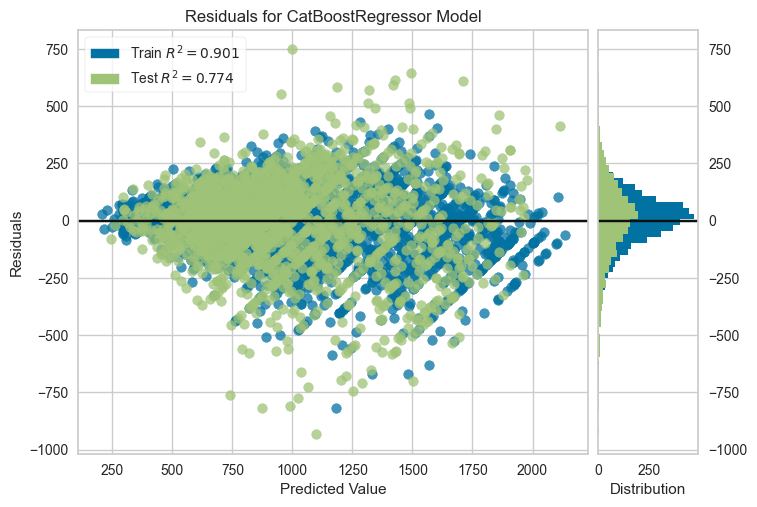

In [19]:
plot_model(catboost)

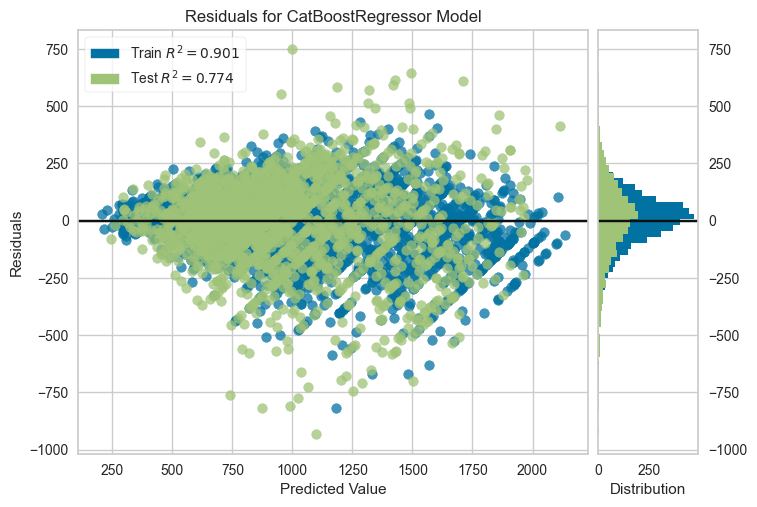

In [20]:
plot_model(catboost,plot='residuals')

Feature Importance

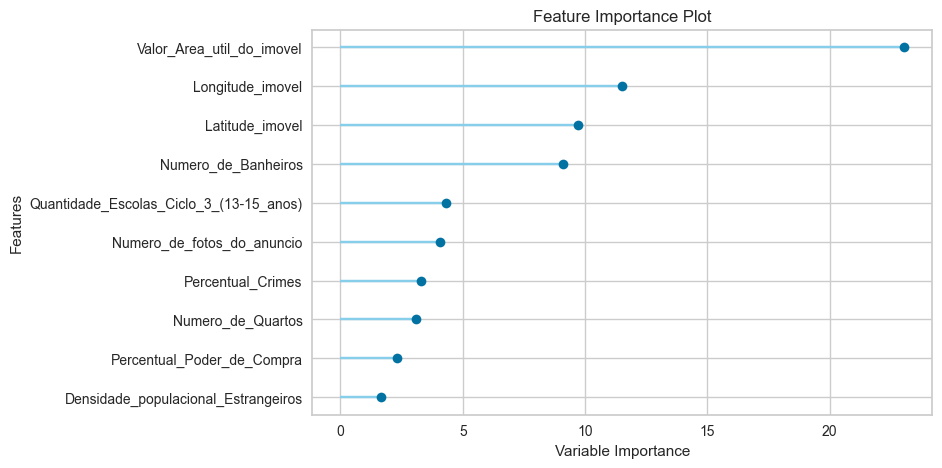

In [49]:
plot_model(catboost, plot='feature')

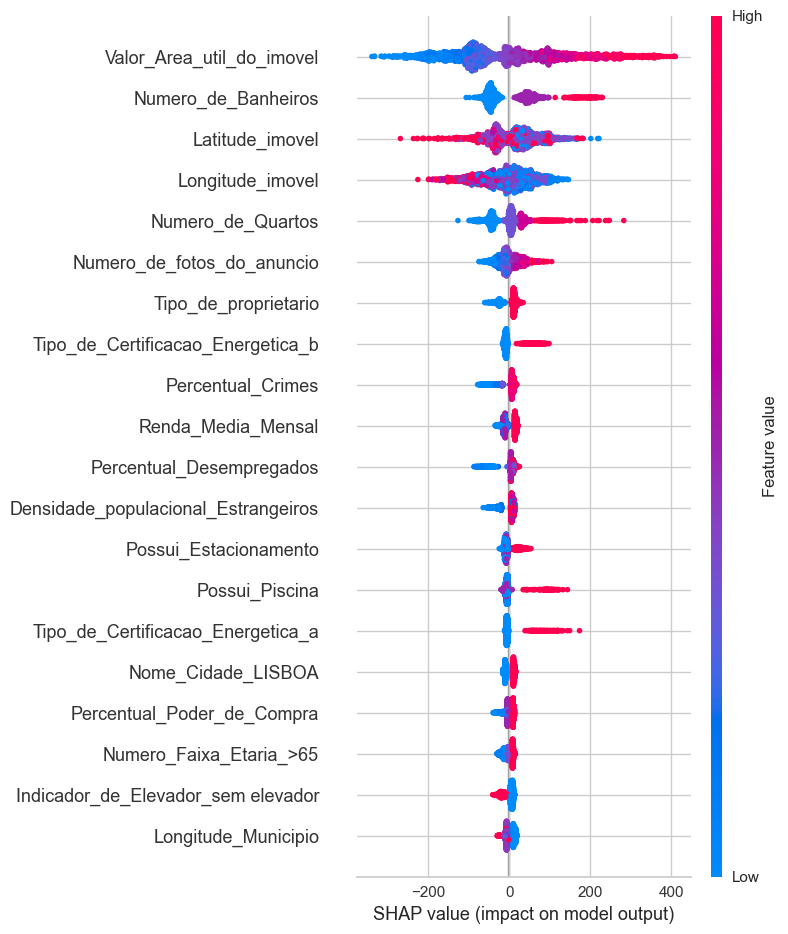

In [21]:
interpret_model(catboost)

Valor_area_util_do_imovel é a variável que mais influencia no valor do arrendamento, 
seguido por Longitude, Latitude e Numero de banheiros. 


In [51]:
# base de teste (oot)
X_test = get_config('X_test')
X_test.head()

,Indicador_de_Elevador,Distrito_do_imovel,Tipo_de_Certificacao_Energetica,Nome_Regiao,Nome_Cidade,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Latitude_imovel,Longitude_imovel,Tipo_de_Construcao,...,Percentual_Poder_de_Compra,Percentual_Crimes,Quantidade_Bancos,Latitude_Municipio,Longitude_Municipio,Distancia_dirigindo_de_Lisboa_Portugal,Distancia_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional
5574,com elevador,PORTO,d,Norte,PORTO,140,0,41.157734,-8.643344,3,...,154.000000,56.200001,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2
790,Não Informado,FARO,c,Algarve,FARO,110,0,37.114037,-8.265055,3,...,130.600006,46.900002,29,37.016273,-7.935177,215.500000,462.600006,22,44.0,2
4973,Não Informado,PORTO,inProcess,Norte,PORTO,50,0,41.162064,-8.603875,3,...,154.000000,56.200001,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2
5587,com elevador,PORTO,d,Norte,PORTO,110,2,41.198135,-8.697906,3,...,154.000000,56.200001,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2
4143,com elevador,PORTO,desconhecido,Norte,PORTO,70,0,41.120384,-8.602467,3,...,154.000000,56.200001,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2


In [55]:
predict_model(catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,138.0108,35499.8174,188.4140,0.7685,0.1850,0.1470


,Indicador_de_Elevador,Distrito_do_imovel,Tipo_de_Certificacao_Energetica,Nome_Regiao,Nome_Cidade,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Latitude_imovel,Longitude_imovel,Tipo_de_Construcao,...,Quantidade_Bancos,Latitude_Municipio,Longitude_Municipio,Distancia_dirigindo_de_Lisboa_Portugal,Distancia_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional,Preco,prediction_label
5574,com elevador,PORTO,d,Norte,PORTO,140,0,41.157734,-8.643344,3,...,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2,1000.0,1358.486360
790,Não Informado,FARO,c,Algarve,FARO,110,0,37.114037,-8.265055,3,...,29,37.016273,-7.935177,215.500000,462.600006,22,44.0,2,1100.0,1047.027894
4973,Não Informado,PORTO,inProcess,Norte,PORTO,50,0,41.162064,-8.603875,3,...,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2,680.0,652.583022
5587,com elevador,PORTO,d,Norte,PORTO,110,2,41.198135,-8.697906,3,...,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2,950.0,1085.264955
4143,com elevador,PORTO,desconhecido,Norte,PORTO,70,0,41.120384,-8.602467,3,...,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2,750.0,589.395184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,com elevador,PORTO,desconhecido,Norte,PORTO,46,0,41.160038,-8.683138,3,...,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2,650.0,679.318369
4651,com elevador,PORTO,c,Norte,PORTO,82,1,41.174290,-8.591434,3,...,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2,780.0,721.027504
2338,com elevador,LISBOA,desconhecido,Area Metropolitana de Lisboa,LISBOA,100,3,38.791130,-9.098609,3,...,460,38.707752,-9.136592,0.000000,274.799988,26,1.0,1,1500.0,1345.737044
2779,Não Informado,LISBOA,c,Area Metropolitana de Lisboa,LISBOA,72,0,38.731205,-9.162795,3,...,460,38.707752,-9.136592,0.000000,274.799988,26,1.0,1,825.0,976.661048


In [58]:
# Finalize model
catboost_final = finalize_model(catboost)

In [59]:
catboost_final

Pipeline(memory=FastMemory(location=C:\Users\johns\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Valor_Area_util_do_imovel',
                                             'Numero_Andar_do_imovel',
                                             'Latitude_imovel',
                                             'Longitude_imovel',
                                             'Tipo_de_Construcao',
                                             'Numero_de_Banheiros',
                                             'Possui_Jardim', 'Possui_Elevador',
                                             'Possui_Estacionamento',
                                             'Possui_Piscina', 'Possui_...
                                             'Nome_Regiao', 'Nome_Cidade'],
                                    transformer=OneHotEncoder(cols=['Indicador_de_Elevador',
                                                                    'Distrito_do_imovel',
                                                                    'Tipo_de_Certificacao_Energetica',
                                                                    'Nome_Regiao',
                                                                    'Nome_Cidade'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x00000242C62B79D0>)])

O PyCaret é uma excelente ferramenta para prototipagem ágil destinada a analistas experientes.

Contudo, ele apresenta algumas restrições. Neste banco de dados específico, encontramos problemas ao tentar calcular os 
valores Shapley do modelo devido a um bug na biblioteca. Assim, seria imprescindível recorrer a bibliotecas mais 
convencionais para realizar as estimativas.